# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [5]:
gold_recovery_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_c

In [7]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                    

In [8]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_c

#### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. 

In [9]:
# Создаем выборку из показателей для расчета эффективности обогащения
train_data = gold_recovery_train[['rougher.output.concentrate_au','rougher.output.recovery', 'rougher.output.tail_au',  'rougher.input.feed_au']]

In [10]:
# Убираем из полученной выборки пропущенные значения
train_data = train_data.loc[train_data['rougher.output.recovery'].isna() != True].dropna()

In [11]:
# Функция рассчитывающая эффективность обогащения
def recovery(row):
    # c - доля золота в концентрате после флотации/очистки;
    c = row[ 'rougher.output.concentrate_au']
    # f - доля золота в сырье/концентрате до флотации/очистки;
    f = row['rougher.input.feed_au']
    # t - доля золота в отвальных хвостах после флотации/очистки.
    t = row['rougher.output.tail_au']
    recovery = (c * (f - t) )/( f * (c - t))
    return recovery * 100

In [12]:
# Добавляем в выборку столбец с рассчитанной по формуле эффективностью обогащения
train_data['formula_recovery'] = train_data.apply(recovery, axis=1)

In [13]:
train_data.head()

,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_au,rougher.input.feed_au,formula_recovery
date,,,,,
2016-01-15 00:00:00,19.793808,87.107763,1.170244,6.486150,87.107763
2016-01-15 01:00:00,20.050975,86.843261,1.184827,6.478583,86.843261
2016-01-15 02:00:00,19.737170,86.842308,1.162562,6.362222,86.842308
2016-01-15 03:00:00,19.320810,87.226430,1.079755,6.118189,87.226430
2016-01-15 04:00:00,19.216101,86.688794,1.012642,5.663707,86.688794


In [14]:
# Считаем МАЕ между полученной эффективностью обогащения и данными из таблицы
mean_absolute_error(train_data['rougher.output.recovery'], train_data['formula_recovery'])

9.444891926100695e-15

## Вывод:  
* Мы вычислили Эффективность обогащения, рассчитанную по формуле: $$ Recovery = (c * (f - t) )/( f * (c - t)) $$  
* Показатель МАЕ между расчитанной эффективностью обогащения и данными из колонки "rougher.output.recovery" 9.444891926100695e-15 этими даныыми можно интерпретировать то, что эффективность обогащения рассчитана правильно

#### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [15]:
# Получаем список колонок недоступных в тестовой выборке
for column in gold_recovery_train.columns:
    if column not in gold_recovery_test.columns:
        print(column)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

### Вывод:  
#### В тестовой выборке недоступны данные на этапах:  
- Флотация:  
    * Расчетные характеристики;  
    * Концентрация серебра, свинца, золы, золота в сырье после флотации.  
    * Концентрация серебра, свинца, золы, золота в отвальных хвостах после флотации.  
- Первый этап чистки:  
    * Концентрация серебра, свинца, золы, золота в сырье после первого этапа чистки.  
    * Концентрация серебра, свинца, золы, золота в отвальных хвостах после первого этапа чистки.  
- Второй этап чистки:  
    * Концентрация серебра, свинца, золы, золота в отвальных хвостах после второго этапа чистки.  
- Финальный концентрат:  
    * Концентрация серебра, свинца, золы, золота в отвальных хвостах на финальной стадии.  
    * Концентрация серебра, свинца, золы, золота в финальном концентрате.  
    * Эффективность обогащения сырья.

#### 1.4. Предобработка данных.

In [16]:
# Список целевых признаков
targets = ['rougher.output.recovery', 'final.output.recovery']

In [17]:
# Добавляем в тестовую выборку столбцы с целевыми признаками.
gold_recovery_test = pd.concat([gold_recovery_test, gold_recovery_full.loc[gold_recovery_test.index][targets]], axis=1)

In [18]:
gold_recovery_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


In [19]:
gold_recovery_test[targets].isna().sum()

rougher.output.recovery    546
final.output.recovery      442
dtype: int64

In [20]:
gold_recovery_full[targets].isna().sum()

rougher.output.recovery    3119
final.output.recovery      1963
dtype: int64

In [21]:
gold_recovery_train[targets].isna().sum()

rougher.output.recovery    2573
final.output.recovery      1521
dtype: int64

In [22]:
# Убираем строки с пропущенными значениями целевых признаков в полном датасете.
gold_recovery_full.dropna(subset=targets, inplace=True)

In [23]:
# Убираем строки с пропущенными значениями целевых признаков в обучающем датасете.
gold_recovery_train.dropna(subset=targets, inplace=True)

In [24]:
# Убираем строки с пропущенными значениями целевых признаков в тестовом датасете.
gold_recovery_test.dropna(subset=targets, inplace=True)

In [25]:
gold_recovery_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


In [26]:
# Убираем из обучающей выборки столбцы, отсутствующие в тестовой выборке
gold_recovery_train = gold_recovery_train[gold_recovery_test.columns]
gold_recovery_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016


In [27]:
# Заполняем пропущенные значения у нецелевых признаков. 
gold_recovery_test.fillna(method='ffill', inplace=True)
gold_recovery_train.fillna(method='ffill', inplace=True)
gold_recovery_full.fillna(method='ffill', inplace=True)

### Вывод:
___
* Мы проверили формулу вычисления эффективности обогащения.  
* Нами были проанализированы признаки, недоступные в тестовой выборке  
* Мы провели предобработку данных:   
    - в тестовую выборку мы добавили столбцы с целевыми признаками;  
    - в тестовой, обучающей и полной выборках были удалены строки, в которых значения целевых признаков были пропущены;  
    - В обучающей выборке мы удалили столбцы, которых не было в тестовой выборке;  
    - Во всех трех наборах данных мы заполнили пропущенные значения у нецелевых признаков с помощью метода "ffill", т.к. он оптимален для работы с данными упорядоченными по времени.  


# 2. Анализ данных

### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

In [28]:
gold_recovery_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [29]:
# Выделяем данные с концентрациями металлов на основных этапах очистки
stages = ['rougher.input.feed_ag', 
           'rougher.input.feed_pb', 
           'rougher.input.feed_au', 
           'rougher.output.concentrate_ag', 
           'rougher.output.concentrate_pb', 
           'rougher.output.concentrate_au', 
           'primary_cleaner.output.concentrate_ag', 
           'primary_cleaner.output.concentrate_pb', 
           'primary_cleaner.output.concentrate_au', 
           'final.output.concentrate_ag', 
           'final.output.concentrate_pb', 
           'final.output.concentrate_au'
           ]

In [30]:
metals = gold_recovery_full[stages]

In [31]:
metals.shape

(19439, 12)

In [32]:
metals.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au
date,,,,,,,,,,,,
2016-01-15 00:00:00,6.100378,2.284912,6.486150,11.500771,7.101074,19.793808,8.547551,10.389648,34.174427,6.055403,9.889648,42.192020
2016-01-15 01:00:00,6.161113,2.266033,6.478583,11.615865,7.278807,20.050975,8.558743,10.497069,34.118526,6.029369,9.968944,42.701629
2016-01-15 02:00:00,6.116455,2.159622,6.362222,11.695753,7.216833,19.737170,8.603505,10.354494,33.969464,6.055926,10.213995,42.657501
2016-01-15 03:00:00,6.043309,2.037807,6.118189,11.915047,7.175616,19.320810,7.221879,8.496563,28.260743,6.047977,9.977019,42.689819
2016-01-15 04:00:00,6.060915,1.786875,5.663707,12.411054,7.240205,19.216101,9.089428,9.986786,33.044932,6.148599,10.142511,42.774141


In [33]:
def concentrations(df, metal):
    if metal == 'ag':
        t_metal = 'серебра'
    elif metal == 'pb':
        t_metal = 'свинца'
    elif metal == 'au':
        t_metal = 'золота'
    print(f'Средняя концентрация {t_metal}:')
    print(f'\tисходного сырья = {df[f"rougher.input.feed_{metal}"].mean()}')
    print(f'\tпосле флотации = {df[f"rougher.output.concentrate_{metal}"].mean()}')
    print(f'\tпосле первичного этапа очистки = {df[f"primary_cleaner.output.concentrate_{metal}"].mean()}')
    print(f'\tв финальном концентрате = {df[f"final.output.concentrate_{metal}"].mean()}')

In [34]:
for metal in ('ag', 'pb', 'au'):
    concentrations(metals, metal)

Средняя концентрация серебра:
	исходного сырья = 8.794927425814688
	после флотации = 11.994759359873429
	после первичного этапа очистки = 8.44240807771906
	в финальном концентрате = 5.168386967510243
Средняя концентрация свинца:
	исходного сырья = 3.585095711585748
	после флотации = 7.606272313195004
	после первичного этапа очистки = 9.810316539310149
	в финальном концентрате = 9.978821384192907
Средняя концентрация золота:
	исходного сырья = 8.266097326589103
	после флотации = 19.772000139486313
	после первичного этапа очистки = 32.1194004078765
	в финальном концентрате = 44.0765129419528


#### Вывод:  
___
* Концентрация серебра повышается после флотации, после чего начинает снижаться, в финальном концентрате его становится меньше чем было в изначальном сырье.  
* Концентрация свинца повышается после флотации и после первичной очистки. В финальном концентрате концентрация практически такая же как после первичной очистки.  
* Концентрация золота повышается на каждом этапе. В финальном концентрате золота больше чем в исходном сырье более чем в 5 раз.

### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. 

In [35]:
title_1 = 'Распределение размеров гранул сырья на обучающей и тестовой выборках в исходном сырье'
title_2 = 'Распределение размеров гранул сырья на обучающей и тестовой выборках после флотации'

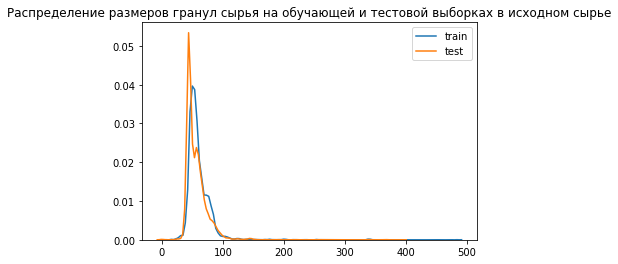

In [36]:
sns.kdeplot(data=gold_recovery_train['rougher.input.feed_size'], label='train')
sns.kdeplot(data=gold_recovery_test['rougher.input.feed_size'], label='test').set(title=title_1);

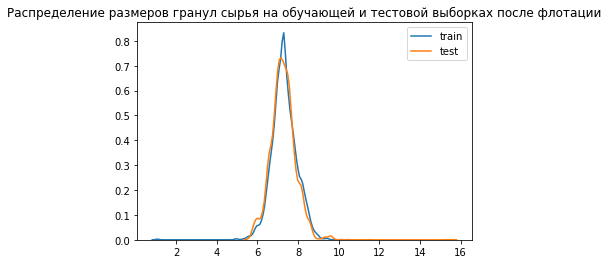

In [37]:
sns.kdeplot(data=gold_recovery_train['primary_cleaner.input.feed_size'], label='train')
sns.kdeplot(data=gold_recovery_test['primary_cleaner.input.feed_size'], label='test').set(title=title_2);

### Вывод:  
___
* Разница распределения в размерах гранул исходного сырья в тестовой и обучающей выборках незначительна. Оценка модели будет правильной.


### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [38]:
stages = [
    'rougher.input.feed_ag', 
    'rougher.input.feed_pb', 
    'rougher.input.feed_sol', 
    'rougher.input.feed_au', 
    'rougher.output.concentrate_ag', 
    'rougher.output.concentrate_pb', 
    'rougher.output.concentrate_sol', 
    'rougher.output.concentrate_au', 
    'final.output.concentrate_ag', 
    'final.output.concentrate_pb', 
    'final.output.concentrate_sol', 
    'final.output.concentrate_au'
]

In [39]:

sum_concentrations = gold_recovery_full[stages].copy()

In [40]:
sum_concentrations['final_output_sum'] = sum_concentrations['final.output.concentrate_ag'] + sum_concentrations['final.output.concentrate_pb'] + sum_concentrations['final.output.concentrate_sol'] + sum_concentrations['final.output.concentrate_au']

In [41]:
sum_concentrations['rougher_input_sum'] = sum_concentrations['rougher.input.feed_ag'] + sum_concentrations['rougher.input.feed_pb'] + sum_concentrations['rougher.input.feed_sol'] + sum_concentrations['rougher.input.feed_au']

In [42]:
sum_concentrations['rougher_output_sum'] = sum_concentrations['rougher.output.concentrate_ag'] + sum_concentrations['rougher.output.concentrate_pb'] + sum_concentrations['rougher.output.concentrate_sol'] + sum_concentrations['rougher.output.concentrate_au']

In [43]:
sum_concentrations.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final_output_sum,rougher_input_sum,rougher_output_sum
date,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.100378,2.284912,36.808594,6.486150,11.500771,7.101074,28.029297,19.793808,6.055403,9.889648,5.507324,42.192020,63.644396,51.680034,66.424950
2016-01-15 01:00:00,6.161113,2.266033,35.753385,6.478583,11.615865,7.278807,28.067063,20.050975,6.029369,9.968944,5.257781,42.701629,63.957723,50.659114,67.012710
2016-01-15 02:00:00,6.116455,2.159622,35.971630,6.362222,11.695753,7.216833,27.454037,19.737170,6.055926,10.213995,5.383759,42.657501,64.311180,50.609929,66.103793
2016-01-15 03:00:00,6.043309,2.037807,36.862241,6.118189,11.915047,7.175616,27.341277,19.320810,6.047977,9.977019,4.858634,42.689819,63.573449,51.061546,65.752751
2016-01-15 04:00:00,6.060915,1.786875,34.347666,5.663707,12.411054,7.240205,27.041023,19.216101,6.148599,10.142511,4.939416,42.774141,64.004667,47.859163,65.908382


In [44]:
sums = [sum_concentrations['rougher_input_sum'], sum_concentrations['rougher_output_sum'], sum_concentrations['final_output_sum']]

[Text(0.5, 1.0, 'График распределения суммарных концентраций всех веществ на разных стадиях')]

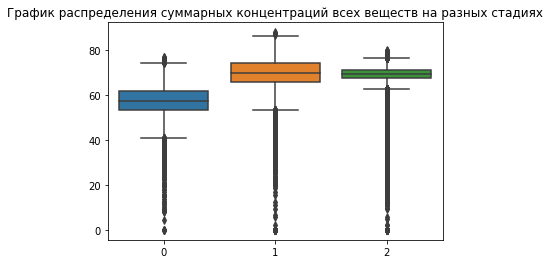

In [45]:
sns.boxplot(data=sums).set(title = 'График распределения суммарных концентраций всех веществ на разных стадиях')

### Вывод:  
* На графике размаха явно выделяются данные, выходящие за нижнюю границу статистически значимой выборки. Это вызвано большим количеством нулевых данных на разных этапах производства, что, скорее всего, явяется следствием ошибок в измерении концентраций.

In [46]:
# Удаляем из выборки  все данные, в которых сумма концентраций металлов на разных этапах равна 0.
clean_sum = sum_concentrations.loc[sum_concentrations['rougher_output_sum'] >0].copy()
clean_sum = clean_sum.loc[clean_sum['final_output_sum'] > 0]
clean_sum = clean_sum.loc[clean_sum['rougher_input_sum'] > 0]

In [47]:
# По индексу из таблицы с чистыми данными удаляем строки с выбросами из тестовой, обучайющей и полной выборок
gold_recovery_test.drop(gold_recovery_test[~gold_recovery_test.index.isin(clean_sum.index)].index, inplace=True)
gold_recovery_train.drop(gold_recovery_train[~gold_recovery_train.index.isin(clean_sum.index)].index, inplace=True)
gold_recovery_full.drop(gold_recovery_full[~gold_recovery_full.index.isin(clean_sum.index)].index, inplace=True)

# 3. Модель

### 3.1. Напишите функцию для вычисления итоговой sMAPE.

In [48]:
def smape(y_target, y_predicted):
    n = len(y_target)
    sum = 0
    for i in range(n):
        sum += (abs(y_target[i] - y_predicted[i])) / ((abs(y_target[i]) + abs(y_predicted[i]))/2)
    
    return (1/n) * sum * 100

In [49]:
 def final_smape(smape_rougher, smape_final):
        return (0.25 * smape_rougher) + (0.75 * smape_final)

### 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. 

In [50]:
# Выделяем независимые и целевые признаки в обучающей выборке
X_train = gold_recovery_train.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
y_rougher_train = gold_recovery_train['rougher.output.recovery']
y_final_train = gold_recovery_train['final.output.recovery']

In [51]:
X_train.shape

(13795, 52)

In [52]:
# Стандартизируем данные обучающих признаков
scaler = StandardScaler()
scaler.fit(X_train)
features_rougher = scaler.transform(X_train)

In [53]:
# Создаем кастомный скорер
custom_scorer = make_scorer(smape, greater_is_better=False)

In [54]:
lr_model = LinearRegression()
lr_rough = cross_val_score(lr_model, X_train, y_rougher_train, scoring=custom_scorer, cv=5)
lr_final = cross_val_score(lr_model, X_train, y_final_train, scoring=custom_scorer, cv=5)
print("Средняя sMAPE rougher на обучающей выборке модели LinearRegression:", abs(lr_rough.mean()))
print("Средняя sMAPE final на обучающей выборке модели LinearRegression:", abs(lr_final.mean()))

Средняя sMAPE rougher на обучающей выборке модели LinearRegression: 7.2678067309003325
Средняя sMAPE final на обучающей выборке модели LinearRegression: 10.990200515158062


In [55]:
dtr_model = DecisionTreeRegressor()
dtr_rough = cross_val_score(dtr_model, X_train, y_rougher_train, scoring=custom_scorer, cv=5)
dtr_final = cross_val_score(dtr_model, X_train, y_final_train, scoring=custom_scorer, cv=5)
print("Средняя sMAPE rougher на обучающей выборке модели DecisionTreeRegressor:", abs(dtr_rough.mean()))
print("Средняя sMAPE final на обучающей выборке модели DecisionTreeRegressor:", abs(dtr_final.mean()))

Средняя sMAPE rougher на обучающей выборке модели DecisionTreeRegressor: 10.243062881721553
Средняя sMAPE final на обучающей выборке модели DecisionTreeRegressor: 16.28179118500979


In [56]:
for i in range(1,11):
    dtr_model = DecisionTreeRegressor(max_depth=i)
    dtr_rough = cross_val_score(dtr_model, X_train, y_rougher_train, scoring=custom_scorer, cv=5)
    dtr_final = cross_val_score(dtr_model, X_train, y_final_train, scoring=custom_scorer, cv=5)
    print(f'модель DecisionTreeRegressor max_depth = {i}:')
    print("Средняя sMAPE rougher на обучающей выборке", abs(dtr_rough.mean()))
    print("Средняя sMAPE final на обучающей выборке", abs(dtr_final.mean()))
    print()

модель DecisionTreeRegressor max_depth = 1:
Средняя sMAPE rougher на обучающей выборке 8.094551623176557
Средняя sMAPE final на обучающей выборке 9.804654284359994

модель DecisionTreeRegressor max_depth = 2:
Средняя sMAPE rougher на обучающей выборке 7.64128707596023
Средняя sMAPE final на обучающей выборке 9.386114676974566

модель DecisionTreeRegressor max_depth = 3:
Средняя sMAPE rougher на обучающей выборке 7.071138009679649
Средняя sMAPE final на обучающей выборке 9.453212948990227

модель DecisionTreeRegressor max_depth = 4:
Средняя sMAPE rougher на обучающей выборке 7.438224811684383
Средняя sMAPE final на обучающей выборке 9.62555416992796

модель DecisionTreeRegressor max_depth = 5:
Средняя sMAPE rougher на обучающей выборке 7.538283780775373
Средняя sMAPE final на обучающей выборке 10.678070447916618

модель DecisionTreeRegressor max_depth = 6:
Средняя sMAPE rougher на обучающей выборке 7.611245484302335
Средняя sMAPE final на обучающей выборке 11.101742641068267

модель Dec

In [57]:
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_rough = cross_val_score(rfr_model, X_train, y_rougher_train, scoring=custom_scorer, cv=5)
rfr_final = cross_val_score(rfr_model, X_train, y_final_train, scoring=custom_scorer, cv=5)
print("Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor:", abs(rfr_rough.mean()))
print("Средняя sMAPE final на обучающей выборке модели RandomForestRegressor:", abs(rfr_final.mean()))

Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor: 7.1167404160793195
Средняя sMAPE final на обучающей выборке модели RandomForestRegressor: 9.866973064397794


In [58]:
for i in range(1,11):
    rfr_model = RandomForestRegressor(n_estimators=100, max_depth=i, random_state=12345)
    rfr_rough = cross_val_score(rfr_model, X_train, y_rougher_train, scoring=custom_scorer, cv=5)
    rfr_final = cross_val_score(rfr_model, X_train, y_final_train, scoring=custom_scorer, cv=5)
    print(f'модель RandomForestRegressor max_depth = {i}:')
    print("Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor:", abs(rfr_rough.mean()))
    print("Средняя sMAPE final на обучающей выборке модели RandomForestRegressor:", abs(rfr_final.mean()))
    print()

модель RandomForestRegressor max_depth = 1:
Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor: 7.763495169841901
Средняя sMAPE final на обучающей выборке модели RandomForestRegressor: 9.706381836919963

модель RandomForestRegressor max_depth = 2:
Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor: 7.265692746012327
Средняя sMAPE final на обучающей выборке модели RandomForestRegressor: 9.243003405899112

модель RandomForestRegressor max_depth = 3:
Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor: 6.796001118806117
Средняя sMAPE final на обучающей выборке модели RandomForestRegressor: 9.161002801136087

модель RandomForestRegressor max_depth = 4:
Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor: 6.762778702248222
Средняя sMAPE final на обучающей выборке модели RandomForestRegressor: 9.04708760170407

модель RandomForestRegressor max_depth = 5:
Средняя sMAPE rougher на обучающей выборке модели RandomF

##### Выбор модели:  
____
* Наилучший результат на обучающей выборке показала модель RandomForestRegressor с параметром max_depth = 5


In [60]:
X_test = gold_recovery_test.drop(['rougher.output.recovery','final.output.recovery'],axis=1)

In [61]:
model = RandomForestRegressor(max_depth=5, random_state=12345, n_estimators=100)
# обучаем модель для предсказания rougher.output.recovery
model.fit(X_train, y_rougher_train)
# предсказываем показатель для тестового rougher.output.recovery
rougher_predict = model.predict(X_test)
print('среднее значение тестового rougher.output.recovery = ', rougher_predict.mean())
# обучаем модель для предсказания final.output.recovery
model.fit(X_train, y_final_train)
# предсказываем показатель для тестового final.output.recovery
final_predict = model.predict(X_test)
print('среднее значение тестового final.output.recovery = ', final_predict.mean())

среднее значение тестового rougher.output.recovery =  86.09412891264624
среднее значение тестового final.output.recovery =  67.65623364548512


In [78]:
# Рассчитываем финальное значение sMAPE для предсказаний.
test_rougher_predicted = rougher_predict
test_final_predicted = final_predict
test_rougher_target = gold_recovery_test['rougher.output.recovery']
test_final_target = gold_recovery_test['final.output.recovery']
print('Средняя sMAPE rougher на обучающей выборке:', smape(test_rougher_target, test_rougher_predicted).mean())
print('Средняя sMAPE final на обучающей выборке:',smape(test_final_target, test_final_predicted).mean())
print('финальное значение sMAPE',final_smape(smape(test_rougher_target, test_rougher_predicted), smape(test_final_target, test_final_predicted)))

Средняя sMAPE rougher на обучающей выборке: 4.63682195010352
Средняя sMAPE final на обучающей выборке: 8.251862040123232
финальное значение sMAPE 7.348102017618304


In [86]:
# Рассчитываем финальное значение sMAPE для константной модели
const_rougher = pd.Series(gold_recovery_test['rougher.output.recovery'].median(), range(len(gold_recovery_test)))
const_final = pd.Series(gold_recovery_test['final.output.recovery'].median(), range(len(gold_recovery_test)))
print('Средняя sMAPE rougher на обучающей выборке:', smape(test_rougher_target, const_rougher).mean())
print('Средняя sMAPE final на обучающей выборке:',smape(test_final_target, const_final).mean())
print('финальное значение sMAPE',final_smape(smape(test_rougher_target, const_rougher), smape(test_final_target, const_final)))


Средняя sMAPE rougher на обучающей выборке: 4.330861527092497
Средняя sMAPE final на обучающей выборке: 7.5758844452105745
финальное значение sMAPE 6.764628715681055


### Вывод:  
* sMAPE для предсказаний на тестовой модели получилось больше чем sMAPE рассчитанное на константной модели. Дальнейшие выводы и статистические расчеты будут требовать дополнительный исследований, измерений и проработок.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке